C:\Users\AYUSH\AppData\Local\Temp\ipykernel_25156\2218757351.py:22: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator(), callback=callback)


Step  1: Energy = -0.83245
Step  2: Energy = -0.91603
Step  3: Energy = -0.15741
Step  4: Energy = -0.15741
Step  5: Energy = -0.60618
Step  6: Energy = -0.96806
Step  7: Energy = -0.96447
Step  8: Energy = -0.99334
Step  9: Energy = -0.99967
Step 10: Energy = -0.91991
Step 11: Energy = -0.92729
Step 12: Energy = -0.99667
Step 13: Energy = -0.99681
Step 14: Energy = -0.99983
Step 15: Energy = -0.99535
Step 16: Energy = -0.99925
Step 17: Energy = -0.99939
Step 18: Energy = -0.99961
Step 19: Energy = -0.99999
Step 20: Energy = -0.99997
Step 21: Energy = -0.99999
Step 22: Energy = -1.00000
Step 23: Energy = -0.99996
Step 24: Energy = -0.99998
Step 25: Energy = -1.00000
Step 26: Energy = -0.99998
Step 27: Energy = -1.00000
Step 28: Energy = -1.00000
Step 29: Energy = -1.00000
Step 30: Energy = -1.00000
Step 31: Energy = -1.00000
Step 32: Energy = -1.00000
Step 33: Energy = -1.00000
Step 34: Energy = -1.00000
Step 35: Energy = -1.00000
Step 36: Energy = -1.00000
Step 37: Energy = -1.00000
S

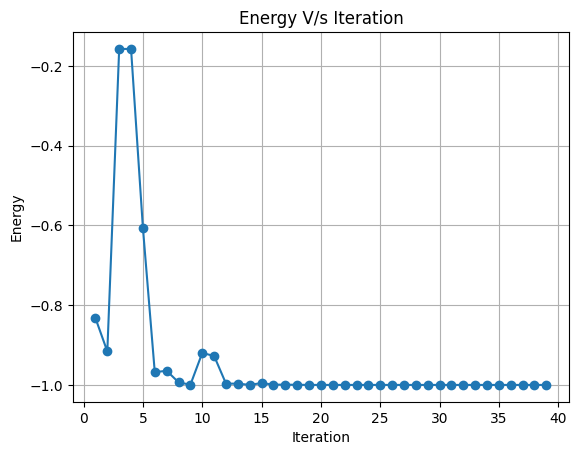

In [ ]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
import matplotlib.pyplot as plt

# Hamiltonian: Z 
hamiltonian = SparsePauliOp.from_list([
    ("Z", 1.0)                               # Energy: +1 for |0>, -1 for |1>
])

# Ansatz: RY rotation on 1 qubit 
ansatz = TwoLocal(num_qubits=1, rotation_blocks="rx",  reps=2)  # since we are rotating about x axis it should turn to |1>  thus output energy dhould be -1

# Optimizer
optimizer = COBYLA(maxiter=1000)

# Energy tracking
energies = []

vqe = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator(), callback=callback)     

#  VQE
result = vqe.compute_minimum_eigenvalue(hamiltonian)


print("\n ground state energy:", result.eigenvalue.real)

# Graph
plt.plot(range(1, len(energies)+1), energies, marker='o')
plt.title("Energy V/s Iteration")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.show()
